**Import libraries**

In [28]:
import tensorflow as tf
from tensorflow.keras import models, datasets
from tensorflow.keras.layers import *
import numpy as np
import matplotlib.pyplot as plt

**Load Fashion MNIST dataset**

In [29]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Visualize images**

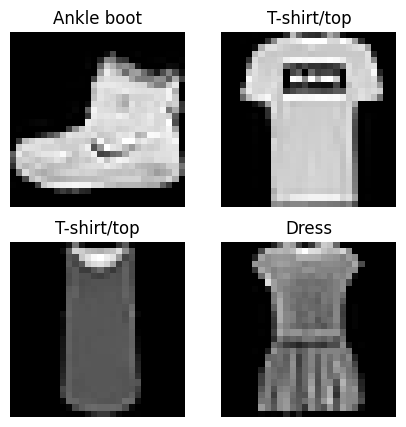

In [30]:
plt.figure(figsize=(5, 5))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title(labels[y_train[i]])
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

**Build a CNN model**

In [31]:
model = models.Sequential([
    InputLayer(input_shape=(28, 28, 1)),
    Conv2D(8, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(28, activation='relu'),
    Dense(10)
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 8)         584       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 392)               0         
                                                                 
 dense_4 (Dense)             (None, 28)               

**Compile and Train the model**

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.5384 - accuracy: 0.8045 - val_loss: 0.4038 - val_accuracy: 0.8546
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3700 - accuracy: 0.8661 - val_loss: 0.3721 - val_accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3341 - accuracy: 0.8795 - val_loss: 0.3320 - val_accuracy: 0.8819
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3099 - accuracy: 0.8877 - val_loss: 0.3363 - val_accuracy: 0.8786
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2930 - accuracy: 0.8938 - val_loss: 0.3387 - val_accuracy: 0.8763
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2803 - accuracy: 0.8983 - val_loss: 0.3049 - val_accuracy: 0.8890
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2689 - accuracy: 0.9015 - val_loss: 0.3026 -

**Plot Accuracy**

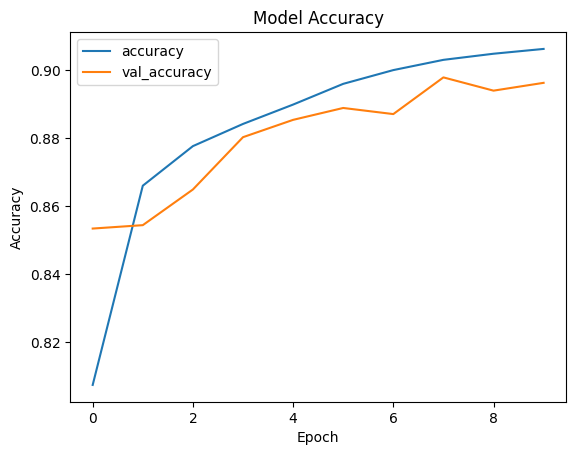

In [7]:
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

**Plot Loss**

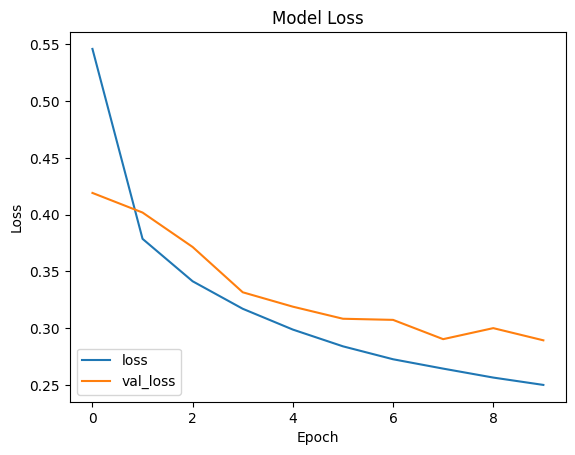

In [8]:
plt.title('Model Loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower left')
plt.show()

**Load Cifar-10 dataset**

In [9]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 4s 0us/step


**Visualize images**

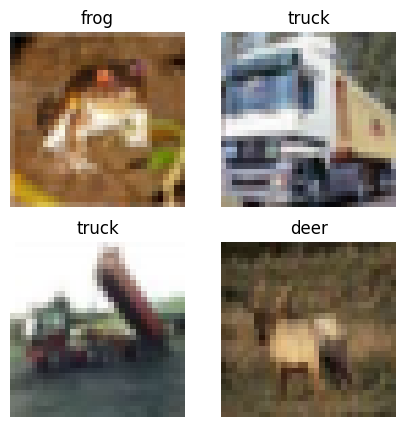

In [10]:
plt.figure(figsize=(5, 5))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title(labels[y_train[i][0]])
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

**Build a CNN model for RGB image**

In [11]:
model = models.Sequential([
    InputLayer(input_shape=(32, 32, 3)),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(28, activation='relu'),
    Dense(10)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 8)         224       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 8)         584       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 8)           0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 288)               0         
                                                                 
 dense_2 (Dense)             (None, 28)               

**Compile and Train the model**

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

Epoch 1/10
1563/1563 [==============================] - 34s 20ms/step - loss: 1.7183 - accuracy: 0.3770 - val_loss: 1.5416 - val_accuracy: 0.4478
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4589 - accuracy: 0.4816 - val_loss: 1.3958 - val_accuracy: 0.5042
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.3647 - accuracy: 0.5192 - val_loss: 1.3220 - val_accuracy: 0.5322
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3087 - accuracy: 0.5380 - val_loss: 1.3038 - val_accuracy: 0.5321
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.2694 - accuracy: 0.5533 - val_loss: 1.2673 - val_accuracy: 0.5541
Epoch 6/10
1563/1563 [==============================] - 27s 18ms/step - loss: 1.2411 - accuracy: 0.5645 - val_loss: 1.2491 - val_accuracy: 0.5574
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2228 - accuracy: 0.5695 - val_loss: 1.2159 -

**Plot Accuracy**

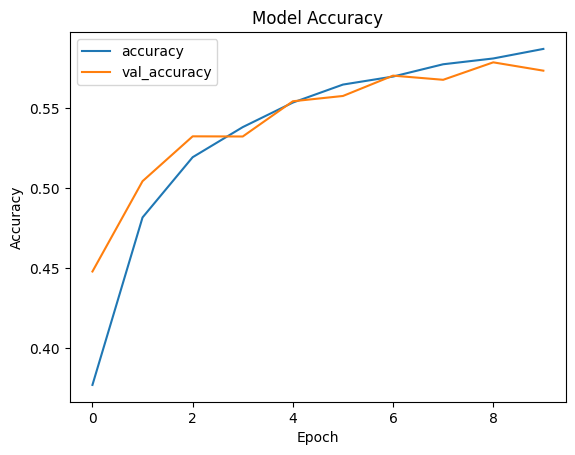

In [13]:
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

**Plot Loss**

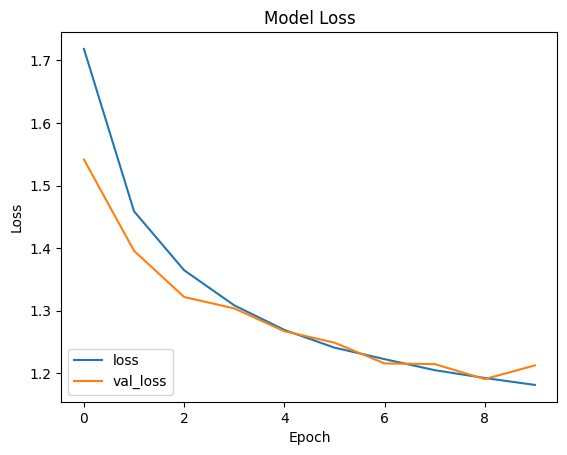

In [14]:
plt.title('Model Loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower left')
plt.show()